### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

                                                            **** By: Rohit Abraham Francis Giles ****

### My GitHub repository.
[Click here](https://github.com/rohitabraham86/turtle_games) to go to my GitHub repository.

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

## 1. Making predictions with regression.

In [18]:
# Import necessary libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [20]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

### Explore the data.

In [21]:
reviews.shape

(2000, 11)

In [22]:
# Any missing values?
print("The sum of missing values in the resepective columns are below:\n\n", reviews.isna().sum())

The sum of missing values in the resepective columns are below:

 gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [5]:
# Determine the metadata of the data set.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [23]:
# Drop unnecessary columns.
rev = reviews.drop(['language','platform'], axis = 1)

rev.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [24]:
# Checking for unique categories
print(reviews['gender'].unique())
print(reviews['education'].unique())

['Male' 'Female']
['graduate' 'PhD' 'diploma' 'postgraduate' 'Basic']


In [25]:
# Rename the column headers.
rev.rename(columns={'remuneration (k£)': 'renumeration',
                 'spending_score (1-100)': 'spending_score'}, inplace=True)

# View column names.
rev.head()

gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [26]:
rev.describe()

age  renumeration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000

In [27]:
df = rev.drop(['product'], axis = 1)

In [28]:
df.corr()

age  renumeration  spending_score  loyalty_points
age             1.000000     -0.005708       -0.224334       -0.042445
renumeration   -0.005708      1.000000        0.005612        0.616065
spending_score -0.224334      0.005612        1.000000        0.672310
loyalty_points -0.042445      0.616065        0.672310        1.000000

### Save the DataFrame as a CSV file

In [162]:
# Create a CSV file as output.
df.to_csv('tur_revs.csv')

Text(0.5, 1.0, 'Loyalty Points Distribution')

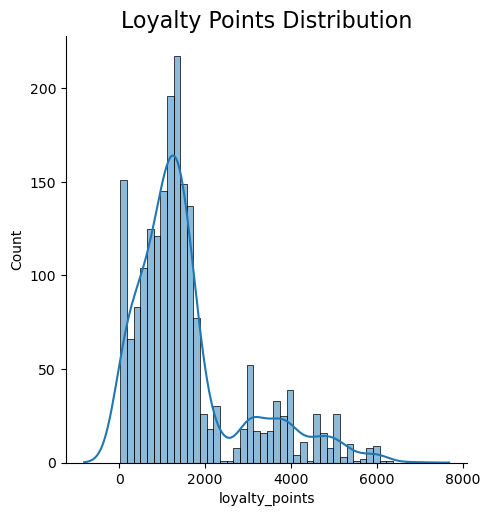

In [29]:
# Look at the loyalty points distribution.
sns.displot(df['loyalty_points'], kde=True,
            kde_kws=dict(cut=3))
plt.title('Loyalty Points Distribution', fontsize=16)

Text(0.5, 1.0, 'Loyalty Points Distribution - Box Plot')

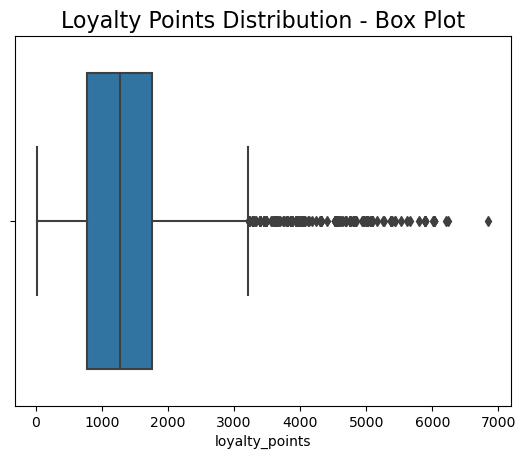

In [30]:
sns.boxplot(df['loyalty_points'])
plt.title('Loyalty Points Distribution - Box Plot', fontsize=16)

Text(0.5, 1.0, 'Age Distribution')

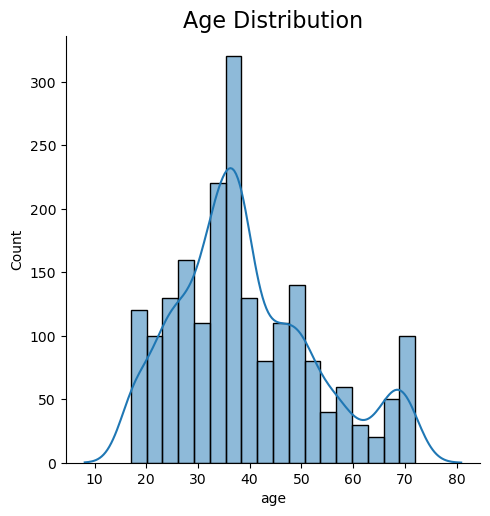

In [31]:
# Look at the age distribution.
sns.displot(df['age'], kde=True,
            kde_kws=dict(cut=3))
plt.title('Age Distribution', fontsize=16)

Text(0.5, 1.0, 'Age - Box Plot')

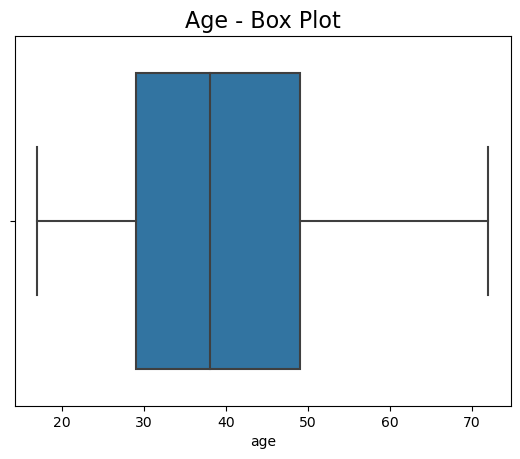

In [32]:
sns.boxplot(df['age'])
plt.title('Age - Box Plot', fontsize=16)

Text(0, 0.5, 'Loyalty Points')

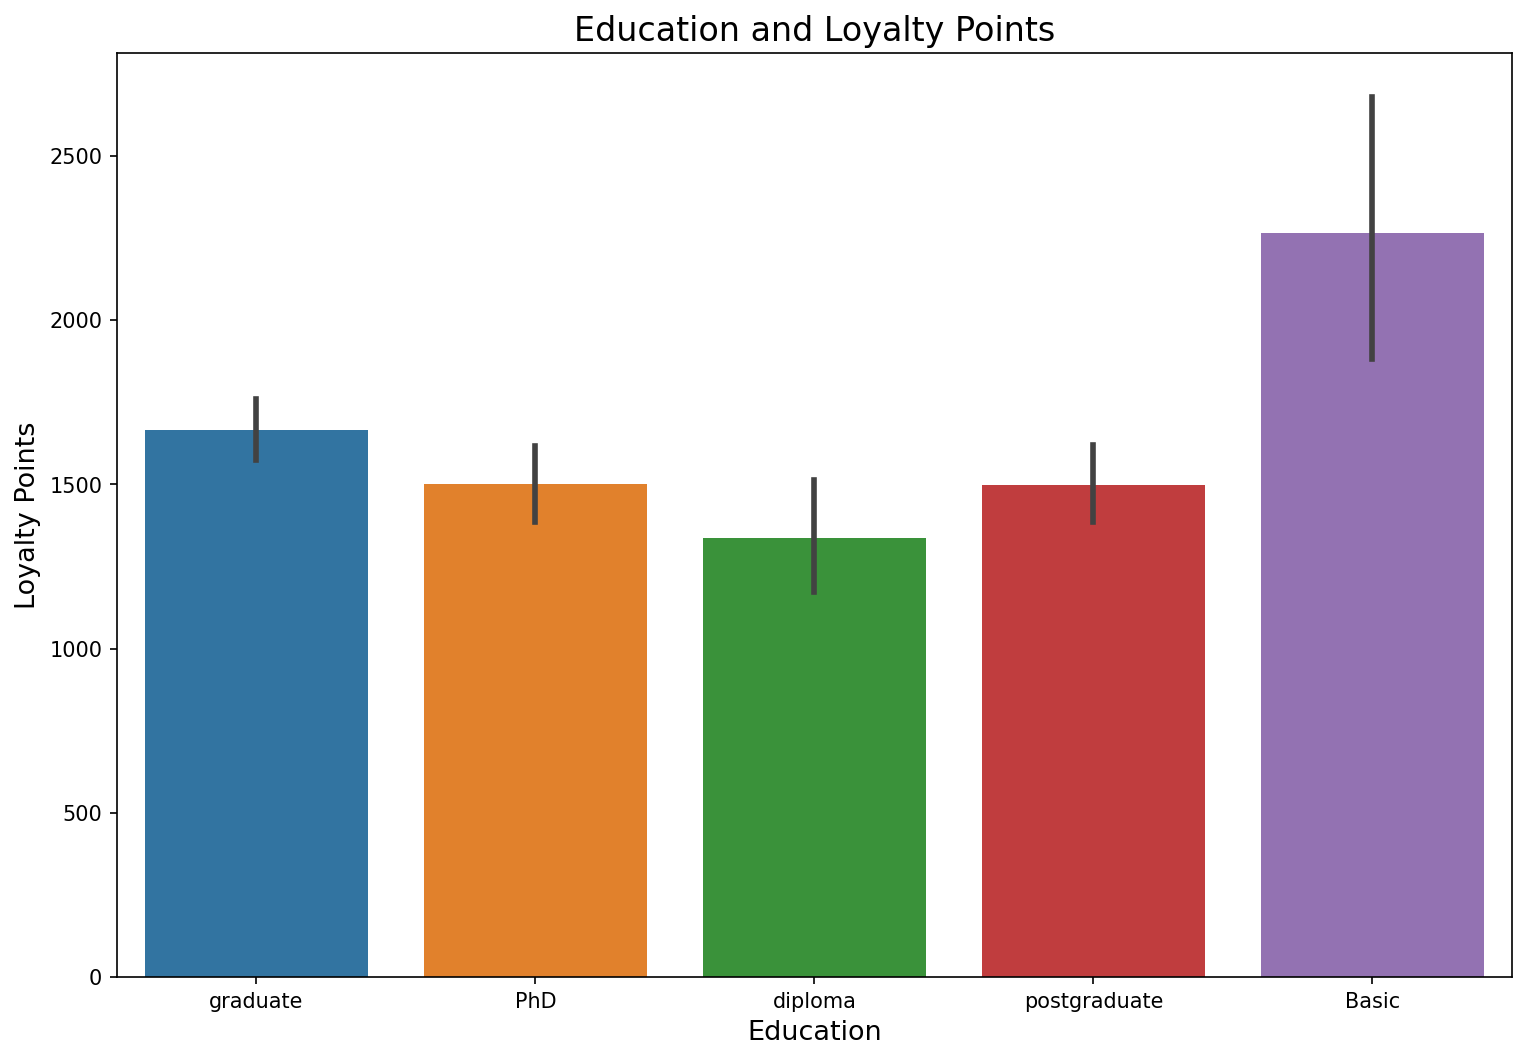

In [33]:
plt.figure(figsize=(12, 8), dpi=150)
sns.barplot(data=df,
                x='education',
                y='loyalty_points')

plt.title('Education and Loyalty Points', fontsize=16)
plt.xlabel('Education', fontsize=13),
plt.ylabel('Loyalty Points', fontsize=13)

In [34]:
df['education'].value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

Text(0, 0.5, 'Spending Score')

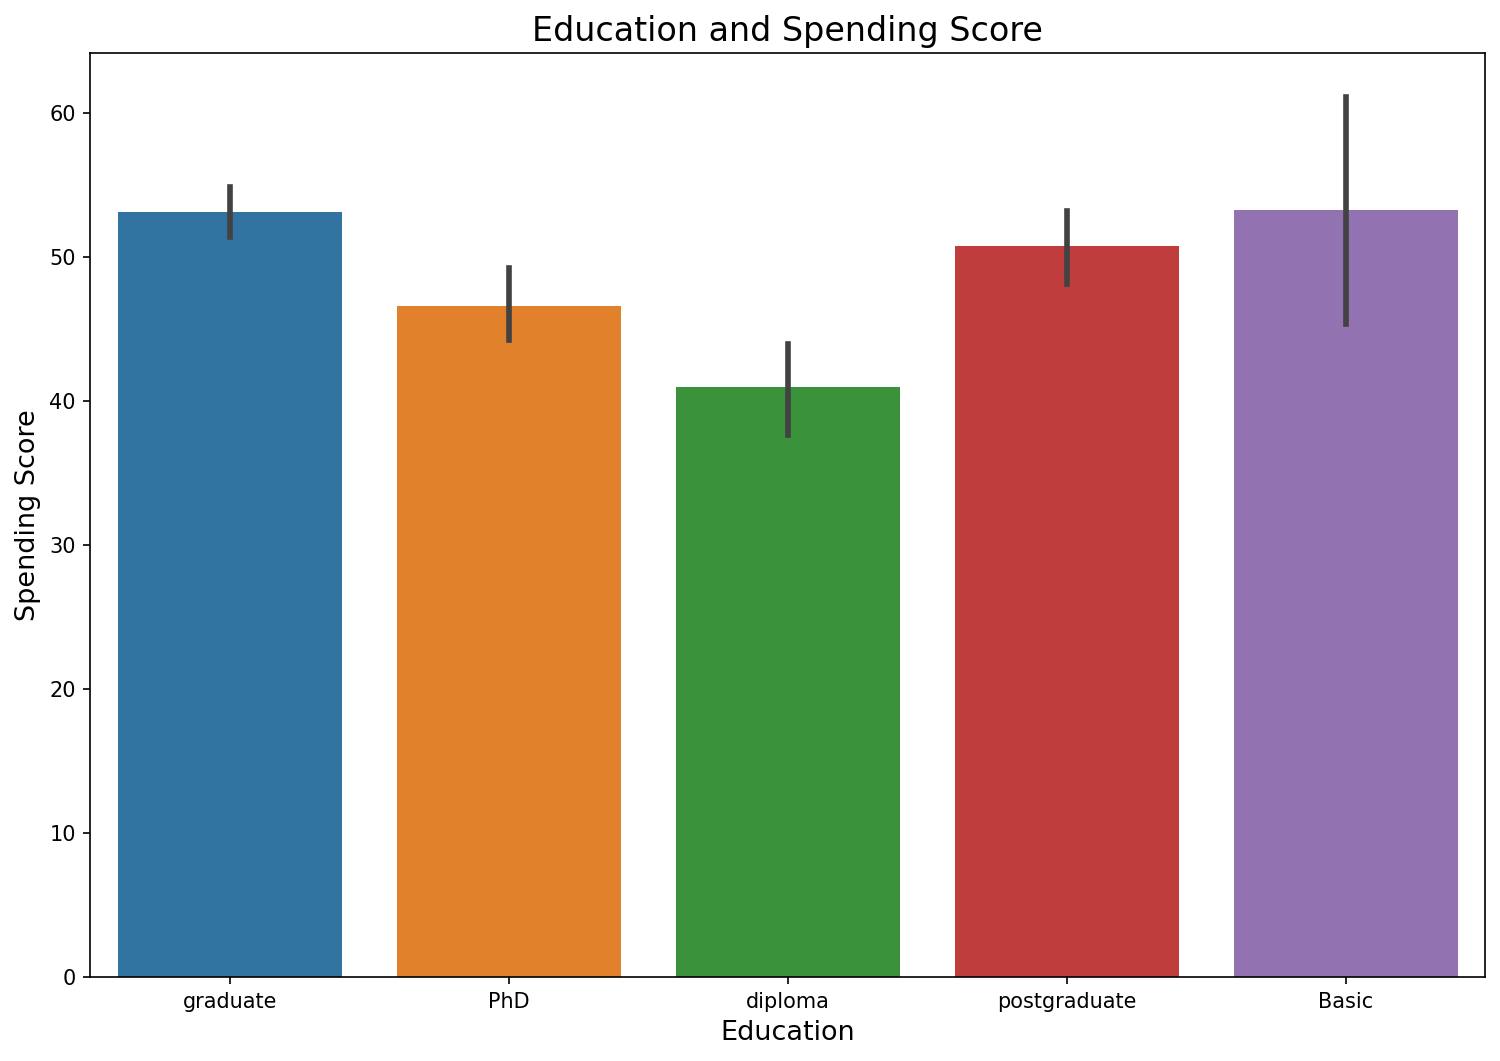

In [35]:
plt.figure(figsize=(12, 8), dpi=150)
sns.barplot(data=df,
                x='education',
                y='spending_score')

plt.title('Education and Spending Score', fontsize=16)
plt.xlabel('Education', fontsize=13),
plt.ylabel('Spending Score', fontsize=13)

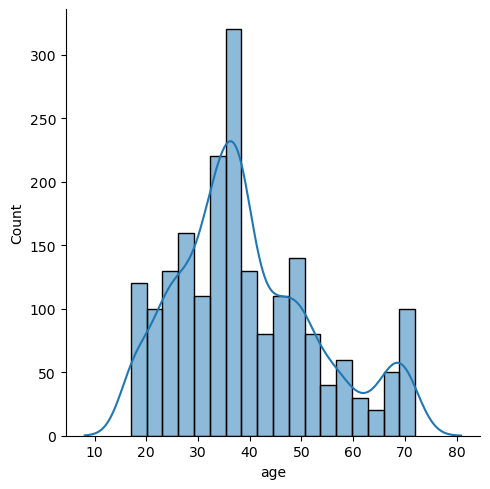

In [36]:
sns.displot(df['age'], kde=True,
            kde_kws=dict(cut=3))

In [37]:
# Define the dependent variable.
y = df['loyalty_points'] 

# Define the independent variable.
x = df['age'] 
r = df['renumeration']
s = df['spending_score']

Text(0, 0.5, 'Loyalty Points')

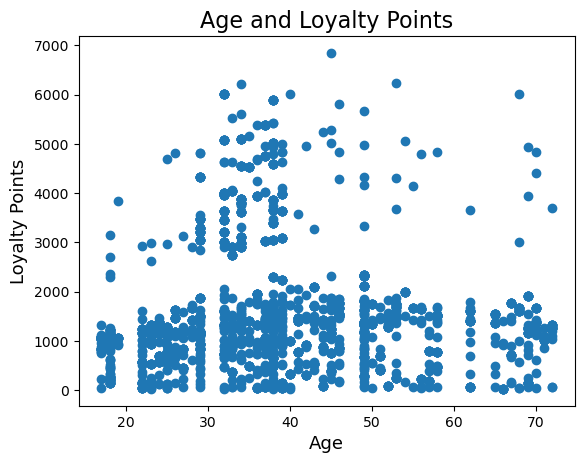

In [38]:
# Check for linearity between Age & Loyalty points.
plt.scatter(x, y)

# Set axis & Title.
plt.title('Age and Loyalty Points', fontsize=16)
plt.xlabel('Age', fontsize=13),
plt.ylabel('Loyalty Points', fontsize=13)

The scatterplot does not demonstrates linearity.

In [39]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = df).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 30 Dec 2022   Prob (F-statistic):             0.0577
Time:                        20:24:10   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [41]:
# Create the linear regression model.
# Set the the coefficient to -4.012805 and the constant to 1736.517739.
y_pred = (1736.517739) + (-4.012805) * df['age']

# View the output
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

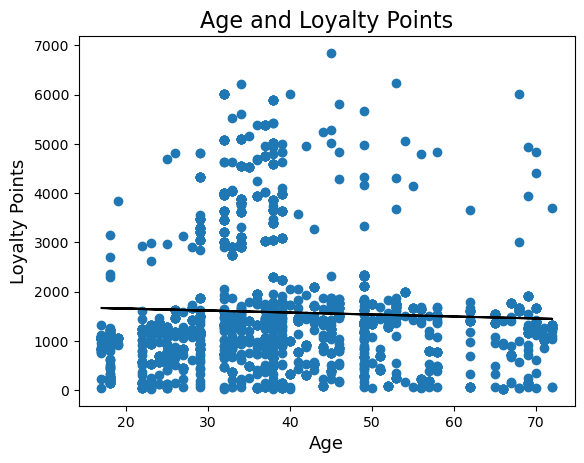

In [65]:
# Visualise the simple linear regression model
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set axis & Title.
plt.title('Age and Loyalty Points', fontsize=16)
plt.xlabel('Age', fontsize=13),
plt.ylabel('Loyalty Points', fontsize=13)
plt.savefig('Age V Loyalty Points')

Text(0, 0.5, 'Loyalty Points')

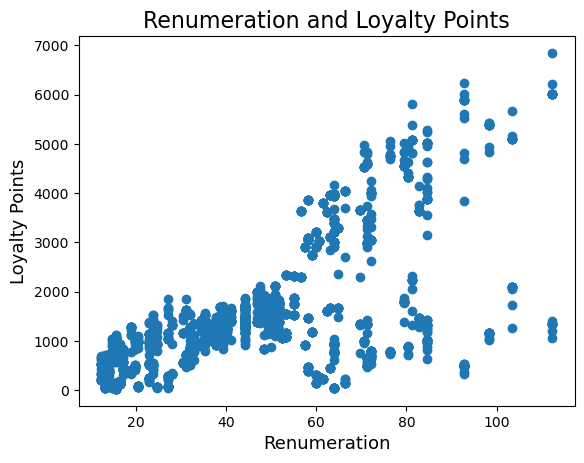

In [43]:
# Check for linearity between Renumeration & Loyalty points.
plt.scatter(r, y)

# Set axis & Title.
plt.title('Renumeration and Loyalty Points', fontsize=16)
plt.xlabel('Renumeration', fontsize=13),
plt.ylabel('Loyalty Points', fontsize=13)

In [44]:
# Create formula and pass through OLS methods.
f1 = 'y ~ r'
test1 = ols(f1, data = df).fit()

# Print the regression table.
test1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        20:24:18   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
r             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Extract the estimated parameters.
print("Parameters: ", test1.params)  

# Extract the standard errors.
print("Standard errors: ", test1.bse)  

# Extract the predicted values.
print("Predicted values: ", test1.predict())  

Parameters:  Intercept   -65.686513
r            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
r             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [46]:
# Create the linear regression model.
# Set the the coefficient to 34.187825 and the constant to -65.686513.
y_pred1 = (-65.686513) + (34.187825) * df['renumeration']

# View the output
y_pred1

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

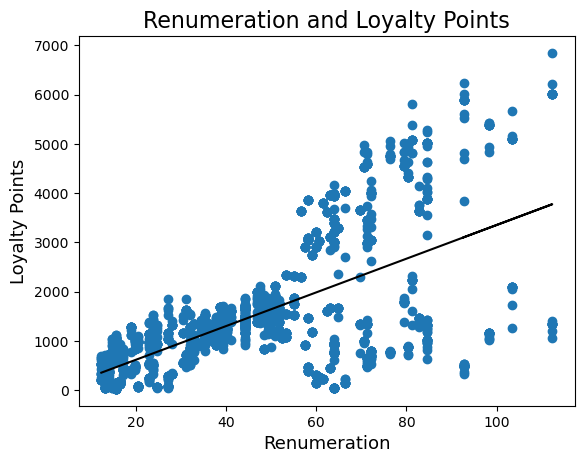

In [63]:
# Visualise the simple linear regression model
# Plot the data points with a scatterplot.
plt.scatter(r, y)

# Plot the regression line (in black).
plt.plot(r, y_pred1, color='black')
# Set axis & Title.
plt.title('Renumeration and Loyalty Points', fontsize=16)
plt.xlabel('Renumeration', fontsize=13),
plt.ylabel('Loyalty Points', fontsize=13)
plt.savefig('Renumeration V Loyalty Points')

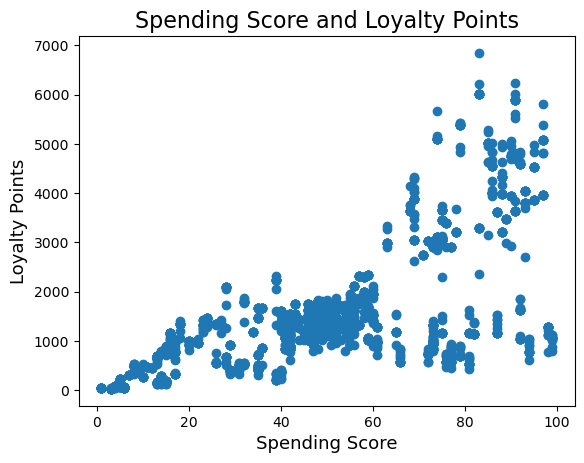

In [62]:
# Check for linearity between Spending Score & Loyalty points.
plt.scatter(s, y)

# Set axis & Title.
plt.title('Spending Score and Loyalty Points', fontsize=16)
plt.xlabel('Spending Score', fontsize=13),
plt.ylabel('Loyalty Points', fontsize=13)
plt.savefig('Spending Score V Loyalty Points')

In [49]:
# Create formula and pass through OLS methods.
f2 = 'y ~ s'
test2 = ols(f2, data = df).fit()

# Print the regression table.
test2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        20:24:23   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
s             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict()) 

Parameters:  Intercept   -75.052663
s            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
s             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [51]:
# Create the linear regression model.
# Set the the coefficient to 33.061693 and the constant to -75.052663.
y_pred2 = (-75.052663) + (33.061693) * df['spending_score']

# View the output
y_pred2

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

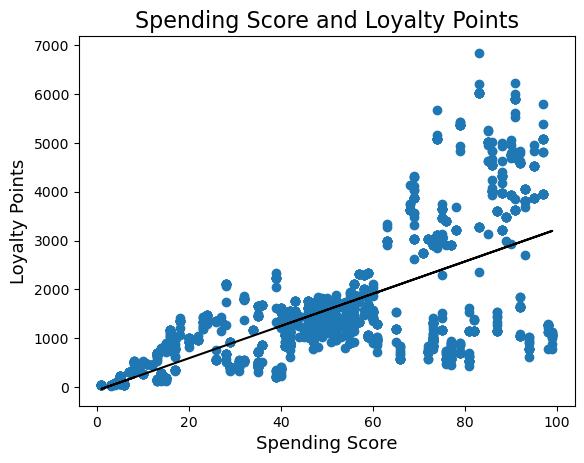

In [64]:
# Visualise the simple linear regression model
# Plot the data points with a scatterplot.
plt.scatter(s, y)

# Plot the regression line (in black).
plt.plot(s, y_pred2, color='black')

# Set axis & Title.
plt.title('Spending Score and Loyalty Points', fontsize=16)
plt.xlabel('Spending Score', fontsize=13),
plt.ylabel('Loyalty Points', fontsize=13)
plt.savefig('Spending Score V Loyalty Points')

#### Conduct an MLR

In [53]:
# Import Libraries.

import sklearn
from sklearn import datasets
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [54]:
# Define the dependent variable.
y = df['loyalty_points'] 

# Define the independent variables.
X = df[['renumeration','spending_score']]

In [55]:
mlr = linear_model.LinearRegression()

# Fit the regression model.
mlr.fit(X, y)

# Call the predictions for X (array).
mlr.predict(X)

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [56]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.826913470198926
Intercept:  -1700.305097014438
Coefficients:


[('renumeration', 33.97949882180282), ('spending_score', 32.89269468782101)]

### Train and test subsets with (MLR) multiple linear regression¶

In [57]:
# Split the data in 'train' (70%) and 'test' (30%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.30,
                                                                            random_state = 0)

In [108]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     3322.
Date:                Sat, 31 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:00:42   Log-Likelihood:                -10803.
No. Observations:                1400   AIC:                         2.161e+04
Df Residuals:                    1397   BIC:                         2.163e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.2975     43.150    -39.

In [109]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [111]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [1195.03731741 4249.27806288 1699.51602609 ... 1775.05193174 2877.77154492
 1681.28973592]


In [112]:
print(mlr.score(X_test, Y_test)*100)

82.81780236452914


The model's prediction accuracy on the test dataset is 82.82% which shows it is a good model.

##### Check for multi colinearity

Given that we have very small standard error which in turn makes the t-value large and which in turn gives us a small p-value, the problem with multi colinearity does not seems to exist.

In [113]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0        8.82           const
1        1.00    renumeration
2        1.00  spending_score


Values closer to 1 or equal to 1 shows there is no linear realationship between the 2 independent variables. So in our case both independent variables are 1.

##### Evaluating the model

In [114]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 398.9370478708788
Mean Square Error (Final): 261331.50010933692


The MAE and MSE values are very high indicating that they are influenced heavily by the ourliers. And since these values are not closer to zero we can assume that the model is not making accurate prediction,

##### To reduce the influence of the outliers we are goinf to use the Square root transformation.

In [119]:
# Use the sqrt function to transform the response variable
Y_transformed = np.sqrt(y)

In [120]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_transformed, test_size=0.3)

In [128]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     5945.
Date:                Sat, 31 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:13:15   Log-Likelihood:                -4253.7
No. Observations:                1400   AIC:                             8513.
Df Residuals:                    1397   BIC:                             8529.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.8571      0.395     -9.

In [129]:
# Train the model using the transformed response variable
mlr = LinearRegression()
mlr.fit(X_train, Y_train)

LinearRegression()

In [130]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [56.73325985 18.89254923 47.81328702 ... 33.03688103  8.26715359
 35.11415146]


In [132]:
# Test the model using the transformed response variable
print(mlr.score(X_test, Y_test)*100)

87.29116490546708


In [133]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0        8.56           const
1        1.00    renumeration
2        1.00  spending_score


In [146]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

Mean Absolute Error (Final): 4.22946926077793
Mean Square Error (Final): 29.111536751101866


##### Plotting to check the predicted values

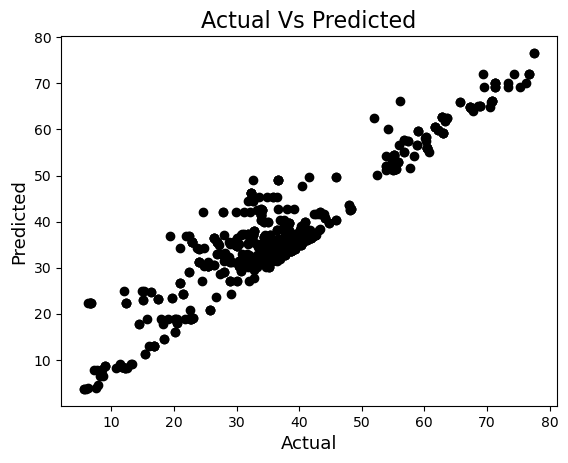

In [159]:
plt.scatter(Y_test, Y_pred,  color='black')
# Set axis & Title.
plt.title('Actual Vs Predicted', fontsize=16)
plt.xlabel('Actual', fontsize=13),
plt.ylabel('Predicted', fontsize=13)
plt.savefig('Actual Vs Predicted')


In [428]:
# Viewing the first 20 rows of actual vs predicted values.
pred_y_df = pd.DataFrame({'Actual Value' : Y_test,'Predicted Value' : Y_pred, 'Difference' : Y_test - Y_pred})

pred_y_df[0:20]

Actual Value  Predicted Value  Difference
882      33.941125        31.388614    2.552511
1128     21.517435        24.228529   -2.711094
83       37.735925        32.665033    5.070891
818      20.149442        16.063683    4.085759
756       6.708204        22.281372  -15.573168
1669     14.866069        24.972225  -10.106156
678      35.791060        36.068818   -0.277758
865      32.557641        37.069209   -4.511568
997      71.351244        69.164268    2.186976
1961     24.839485        34.178817   -9.339332
1699     19.416488        36.797552  -17.381064
939      54.972721        51.171347    3.801374
164      36.660606        35.225773    1.434833
97       38.768544        37.195792    1.572752
309      40.012498        37.333806    2.678692
214      12.247449         8.267154    3.980295
745      62.880840        62.797134    0.083706
708      37.202150        35.206441    1.995710
992      22.360680        36.797552  -14.436872
741      61.708994        60.435935    1.273060

> The predicted values are closer to the actual values, even though it is not a perfect fit. But the MAE & MSE values are very small, the model can predict with an accuracy of 87.3%.

## 2. Making prediction with clustering.

In [459]:
# Import necessary libraries.
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

In [461]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('tur_revs.csv')

# View DataFrame.
df2

Unnamed: 0  gender  age  renumeration  spending_score  loyalty_points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  \
0     graduate   
1     graduate   
2     graduate   
3     graduate   
4     graduate   
...        ...   
1995       PhD   
1996       PhD   
1997  graduate   
1998       PhD   
1999       PhD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drop

In [462]:
# Drop unnecessary columns.
df2_clust = df2.drop(columns=['Unnamed: 0','review', 'summary'])


# View DataFrame.
df2_clust

gender  age  renumeration  spending_score  loyalty_points education
0       Male   18         12.30              39             210  graduate
1       Male   23         12.30              81             524  graduate
2     Female   22         13.12               6              40  graduate
3     Female   25         13.12              77             562  graduate
4     Female   33         13.94              40             366  graduate
...      ...  ...           ...             ...             ...       ...
1995  Female   37         84.46              69            4031       PhD
1996  Female   43         92.66               8             539       PhD
1997    Male   34         92.66              91            5614  graduate
1998    Male   34         98.40              16            1048       PhD
1999    Male   32         92.66               8             479       PhD

[2000 rows x 6 columns]

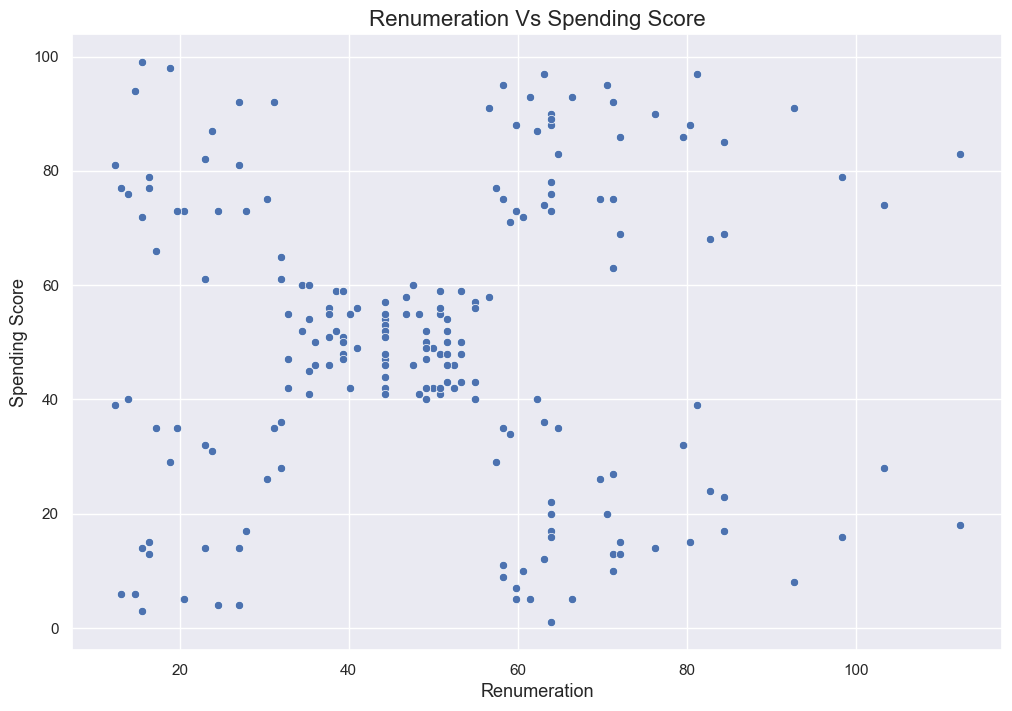

In [463]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration',
                y='spending_score',
                data=df2_clust
                )
plt.title('Renumeration Vs Spending Score', fontsize=16)
plt.xlabel('Renumeration', fontsize=13),
plt.ylabel('Spending Score', fontsize=13)
plt.savefig('Renumeration Vs Spending Score')


<Figure size 1000x1000 with 0 Axes>

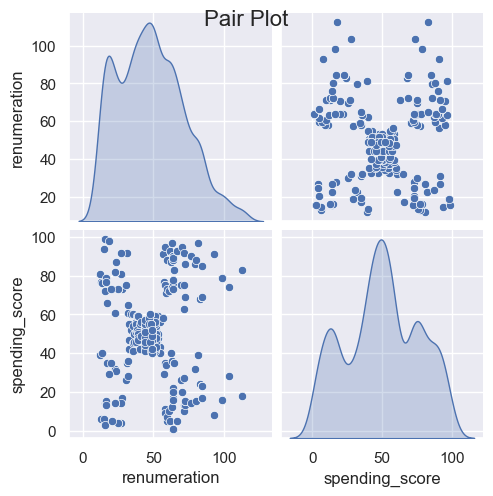

In [464]:
# Create a pairplot with Seaborn.
x = df2_clust[['renumeration', 'spending_score']]
plt.figure(figsize=(10, 10))
sns.pairplot(df2_clust,
             vars=x,
             diag_kind='kde')
plt.suptitle('Pair Plot', fontsize=16)
plt.savefig('Pair Plot')

>From the above plots we can see clearly that, there are 5 clusters. And from them there is a clear relaionship between the spending scores and renumeration.

### Determining the optimal number of clusters using Elbow and silhoutte methods

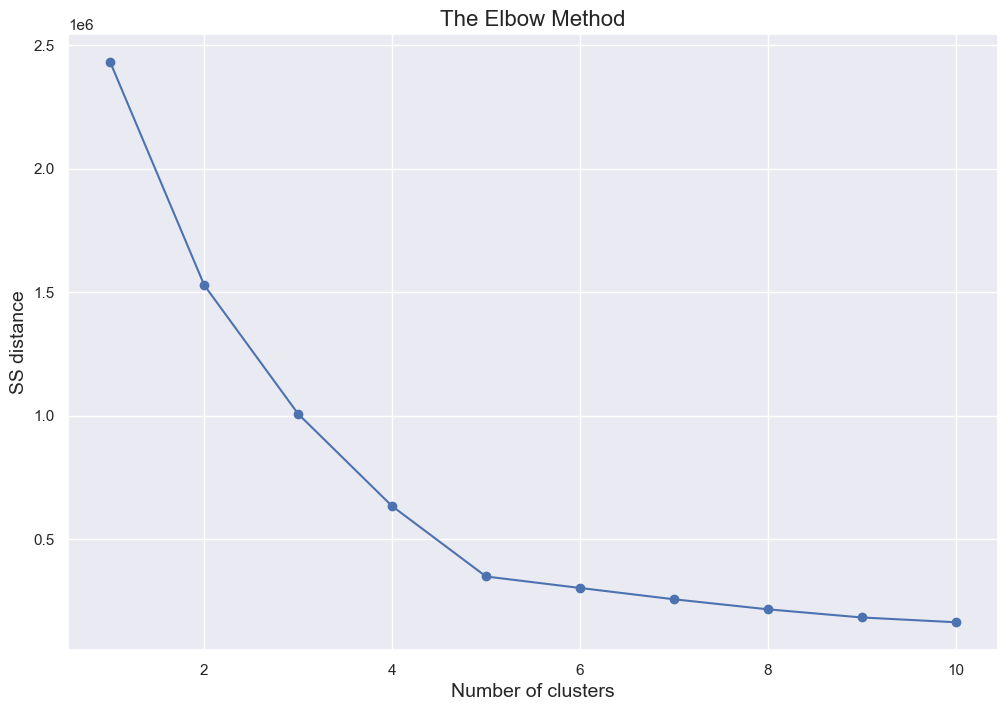

In [465]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.

plt.title("The Elbow Method", fontsize=16)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("SS distance", fontsize=14)
plt.savefig('Elbow Method')
plt.show()

> We can see the elbow formation at 5, hence K=5.

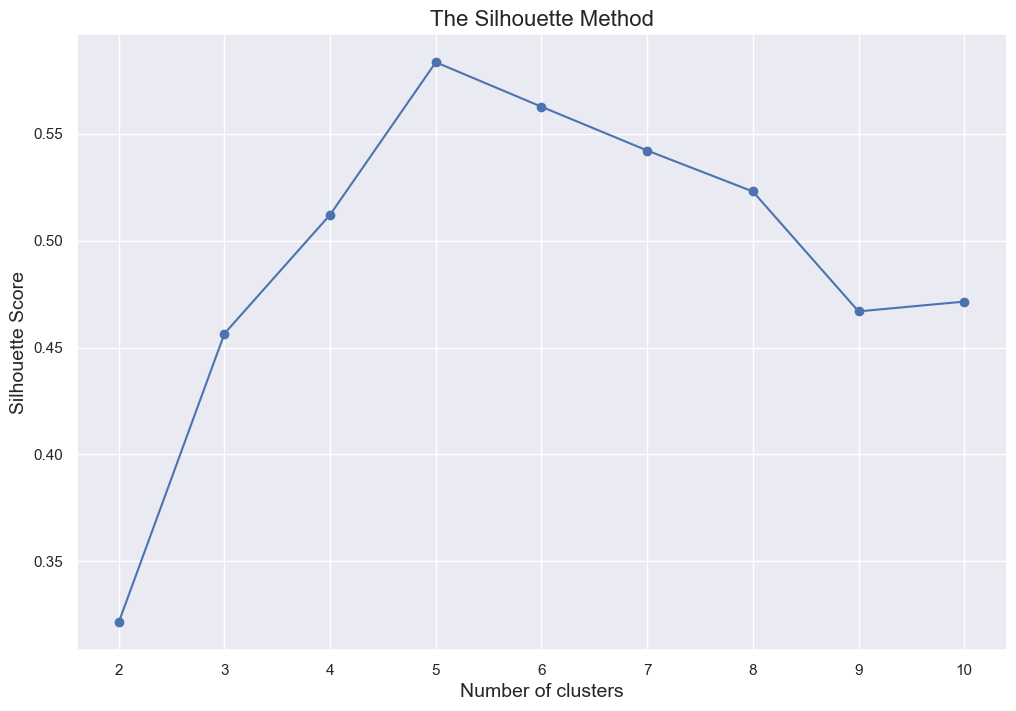

In [466]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method", fontsize=16)
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.savefig('Silhouette')
plt.show()

>From the Silhouette method we can see that the number of clusters peaks at 5 and then starts to reduce. So we can use 5 as the number of clusters

####  Evaluate k-means model at different values of *k*

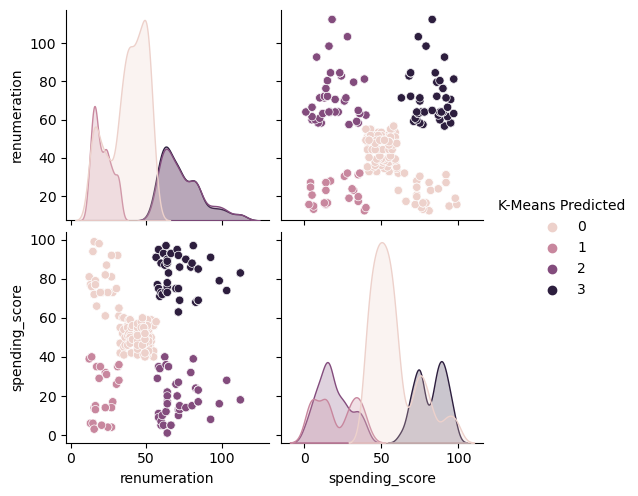

In [180]:
# Use 4 clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [181]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

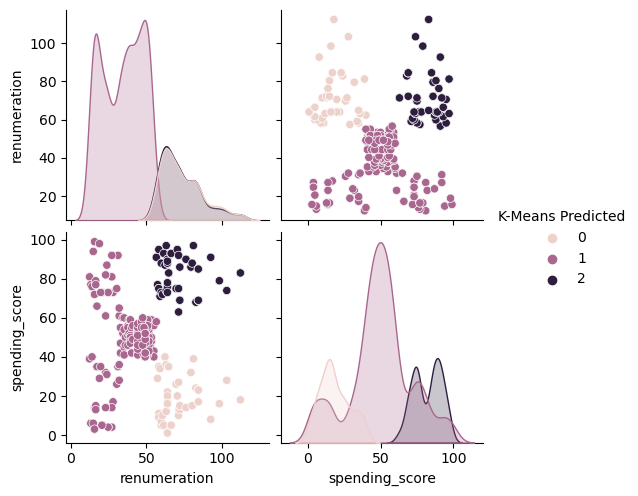

In [182]:
# Use 3 clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [183]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

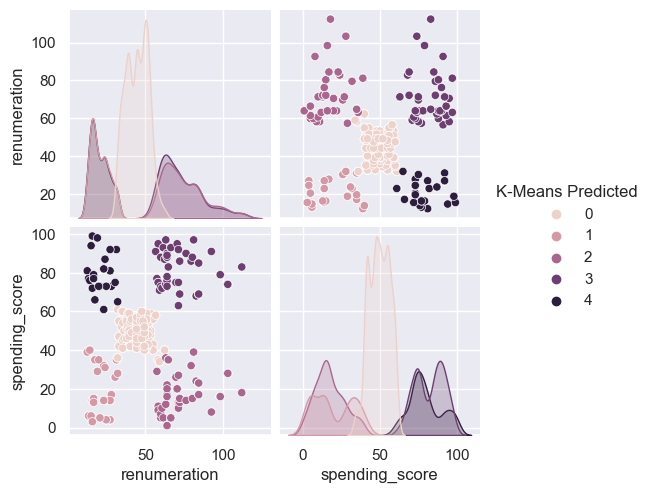

In [467]:
# Use 5 clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
plt.savefig('pair_plot_k5')

In [468]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [475]:
cluster5 = pd.DataFrame(x['K-Means Predicted'].value_counts())

cluster5

K-Means Predicted
0                774
3                356
2                330
1                271
4                269

> For K=5 the clusters are more balanced compared to the other two K values. Even though the cluster 0 seems to be larger than the other four cluster it is not very larger compared to the clusters when we used K values 3 & 4.
 Also visually we can see 5 clear clusters formed.

### Plot and interpret the clusters

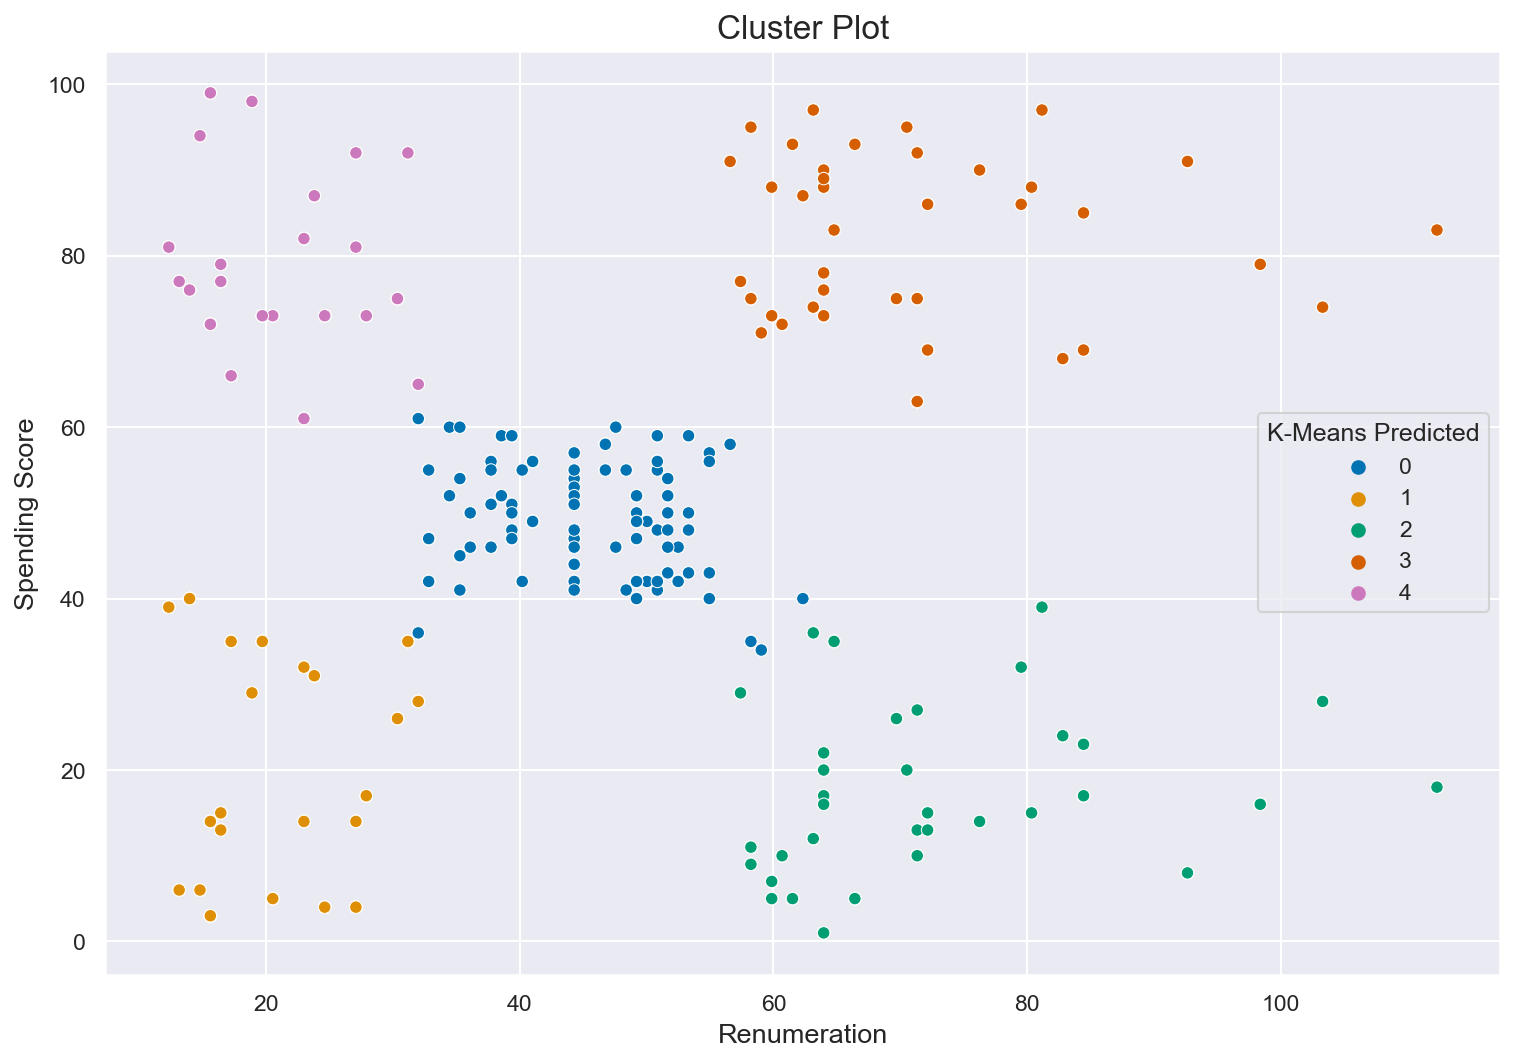

In [476]:
# Visualising the clusters.
# Set plot size.
plt.figure(figsize=(12, 8), dpi=150)

# Create a scatterplot.
sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette='colorblind')

# Insert labels and title.
plt.title("Cluster Plot",fontsize=16)
plt.xlabel("Renumeration",fontsize=13)
plt.ylabel("Spending Score",fontsize=13)
plt.savefig('Cluster')

### Observations & Conclusions.
- The clusters are well seperated.

- They don't overlap each other.

- The cluster shape is roughly circular.

- But they are not densily populated.
- We can see that cluster 2 has people with high renumeration but they are not spending much.
- Cluster 1 is the least spending group, due to their less renumeration.
- Cluster 0 is right in the middle.
- Cluster 4 & 3 are the high spenders.


## 3. Analyse the customer sentiments with reviews & summary

In [209]:
# Import all the necessary packages.
import nltk 
import os 

#nltk.download ('punkt')
#nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

In [280]:
# Load the data set as df3.
df3 = df2[['review', 'summary']]

# View DataFrame.
df3

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [281]:
# Explore data set.
df3.describe()

review     summary
count      2000        2000
unique     1980        1432
top     love it  Five Stars
freq          5         378

In [282]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [283]:
# Any missing values?
print("The sum of missing values in the resepective columns are below:\n\n", df3.isna().sum())

The sum of missing values in the resepective columns are below:

 review     0
summary    0
dtype: int64


### Prepare the data for NLP

##### Change to lower case and join the elements in each of the columns respectively (review and summary)

In [284]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [285]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [286]:
# View the dataframe
df3.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

##### Replace punctuation in each of the columns respectively (review and summary)

In [287]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

In [288]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

In [289]:
# View the dataframe
df3.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

##### Drop duplicates in both columns

In [290]:
# Check for duplicates - summary
df3.summary.duplicated().sum()

649

In [291]:
# Check for duplicates - review
df3.review.duplicated().sum()

50

In [292]:
# Drop duplicates in both columns.
df3.drop_duplicates(subset=['review'], inplace=True)
df3.drop_duplicates(subset=['summary'], inplace=True)

In [293]:
# View DataFrame.
df3.reset_index(inplace=True)
df3

index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1344   1989  this is a fun card game for people who like wo...   
1345   1990  fun for the family just make certain you agree...   
1346   1992  great game to keep the mind active we play it ...   
1347   1994  we are retired and find this a great way to st...   
1348   1995  the perfect word game for mixed ages with mom ...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1344  this is a fun card game for people who like words  
1345  sort of a card game equivalent of scrabble and...  
1346                 great game to keep the mind active  
1347                                  a great mind game  
1348      the perfect word game for mixed ages with mom  

[1349 rows x 3 columns]

### Tokenise and create wordclouds

In [294]:
# Create new DataFrame (copy DataFrame).
df3_copy = df3.copy(deep=True)
# View DataFrame.
df3_copy

index                                             review  \
0         0  when it comes to a dms screen the space on the...   
1         1  an open letter to galeforce9 your unpainted mi...   
2         2  nice art nice printing why two panels are fill...   
3         3  amazing buy bought it as a gift for our new dm...   
4         4  as my review of gf9s previous screens these we...   
...     ...                                                ...   
1344   1989  this is a fun card game for people who like wo...   
1345   1990  fun for the family just make certain you agree...   
1346   1992  great game to keep the mind active we play it ...   
1347   1994  we are retired and find this a great way to st...   
1348   1995  the perfect word game for mixed ages with mom ...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1344  this is a fun card game for people who like words  
1345  sort of a card game equivalent of scrabble and...  
1346                 great game to keep the mind active  
1347                                  a great mind game  
1348      the perfect word game for mixed ages with mom  

[1349 rows x 3 columns]

In [295]:
# String all the reviews together in a single variable.
# Create an empty string variable.
all_reviews = ''
for i in range(df3_copy.shape[0]):
    # Add each review.
    all_reviews = all_reviews + df3_copy['review'][i]

In [296]:
# String all the summary together in a single variable.
# Create an empty string variable.
all_summary = ''
for i in range(df3_copy.shape[0]):
    # Add each summary.
    all_summary = all_summary + df3_copy['summary'][i]

In [302]:
# Create a word cloud: Review.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_rev = WordCloud(width=1600, height=900,
                           background_color='white',
                           colormap='plasma',
                           stopwords='none',
                           min_font_size=10).generate(all_reviews)

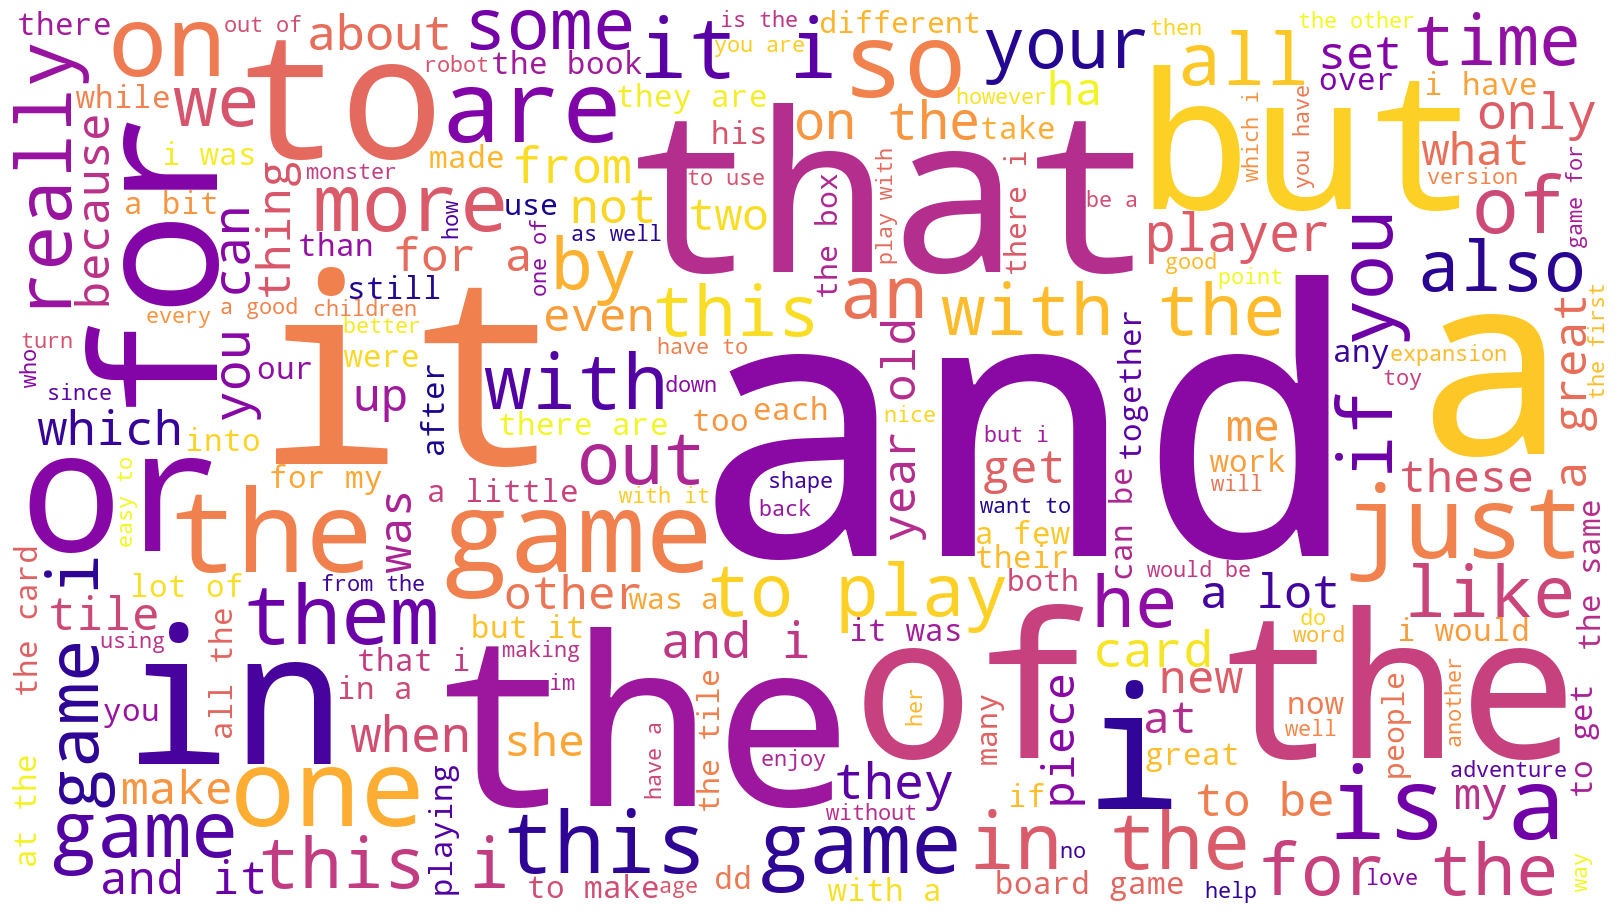

In [303]:
# Plot the WordCloud image: Review.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_rev) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [300]:
# Create a word cloud: Summary.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_sum = WordCloud(width=1600, height=900,
                           background_color='white',
                           colormap='plasma',
                           stopwords='none',
                           min_font_size=10).generate(all_summary)

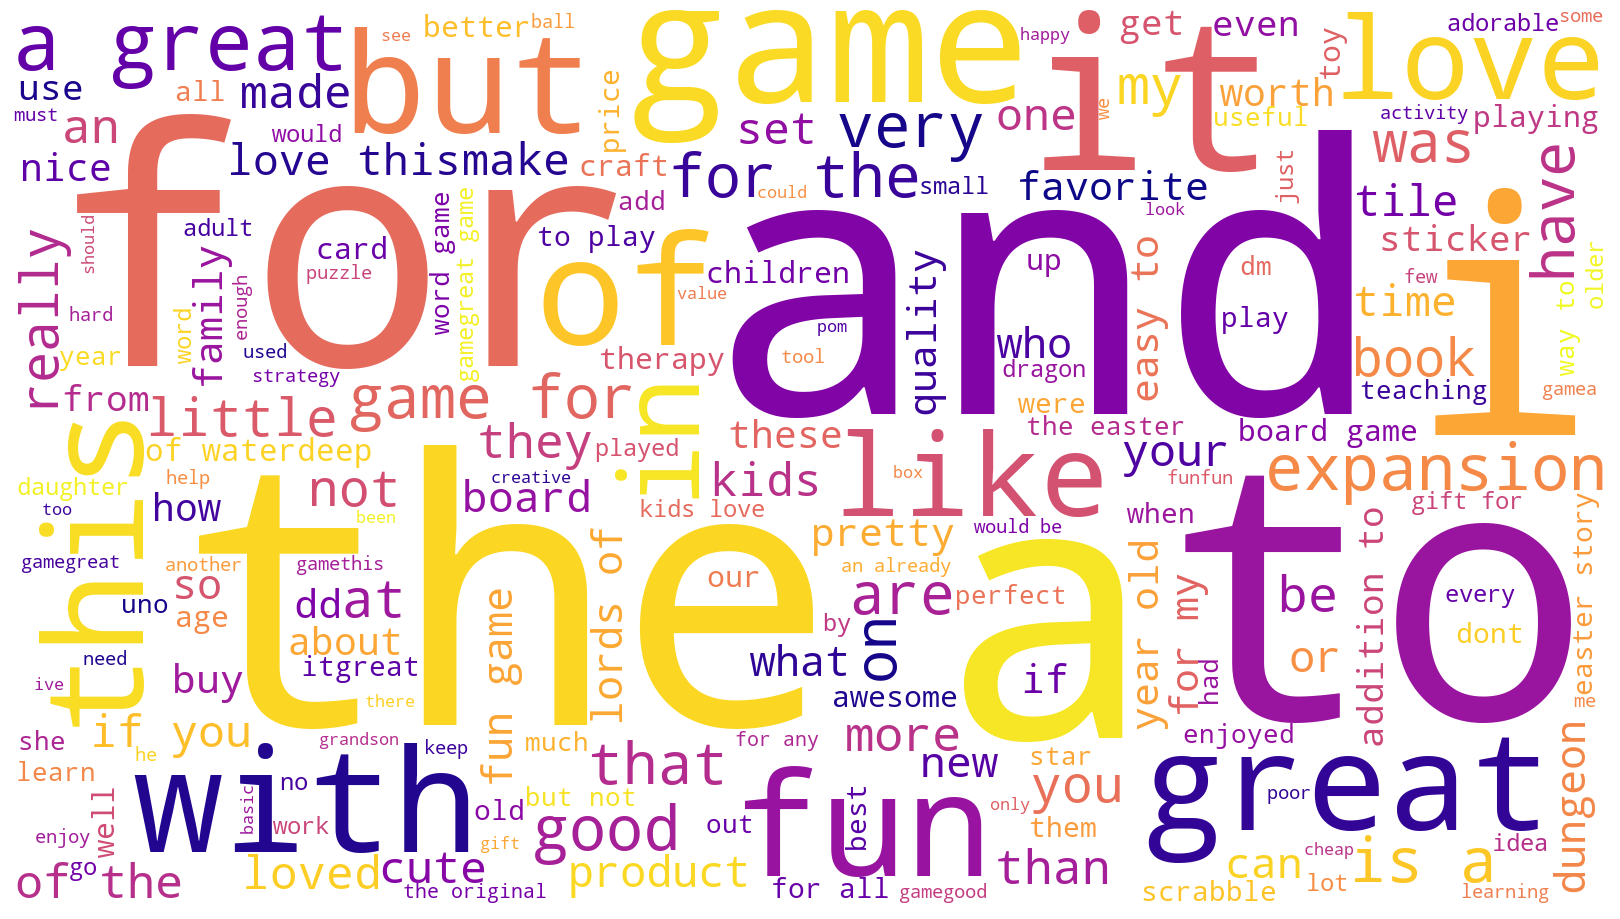

In [301]:
# Plot the WordCloud image: Summay.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_sum) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [304]:
# Apply tokenisation to review columns.
df3_copy['tokens_rev'] = df3_copy['review'].apply(word_tokenize)

# View Data.
df3_copy['tokens_rev'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_rev, dtype: object

In [305]:
# Apply tokenisation to summary columns.
df3_copy['tokens_sum'] = df3_copy['summary'].apply(word_tokenize)

# View Data.
df3_copy['tokens_sum'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_sum, dtype: object

In [306]:
# Define an empty list of tokens.
all_rev_tokens = []

for i in range(df3_copy.shape[0]):
    # Add each tokens_rev to the list.
    all_rev_tokens = all_rev_tokens + df3_copy['tokens_rev'][i]

In [307]:
all_sum_tokens = []

for i in range(df3_copy.shape[0]):
    # Add each tokens_sum to the list.
    all_sum_tokens = all_sum_tokens + df3_copy['tokens_sum'][i]

### Frequency distribution and polarity

#### Create frequency distribution¶

In [308]:
# Determine the frequency distribution.

# Calculate the frequency distribution for reviews.
fdist_rev = FreqDist(all_rev_tokens)

# Preview data.
fdist_rev

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [309]:
# Calculate the frequency distribution for summary.
fdist_sum = FreqDist(all_sum_tokens)

# Preview data.
fdist_sum

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

#### Remove alphanumeric characters and stopwords

In [310]:
# Delete all the alpanum in reviews.
tokens_rev2 = [word for word in all_rev_tokens if word.isalnum()]

# Delete all the alpanum in summary.
tokens_sum2 = [word for word in all_sum_tokens if word.isalnum()]

In [311]:
# Remove all the stopwords in reviews.
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens_rev2 without stop words.
tokens_rev3 = [x for x in tokens_rev2 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_rev3_string = ''

for value in tokens_rev2:
    # Add each filtered token word to the string.
    tokens_rev3_string = tokens_rev3_string + value + ' '

In [312]:
# Remove all the stopwords in summary.
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens_sum2 without stop words.
tokens_sum3 = [x for x in tokens_sum2 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_sum3_string = ''

for value in tokens_sum2:
    # Add each filtered token word to the string.
    tokens_sum3_string = tokens_sum3_string + value + ' '


#### Create wordcloud without stopwords

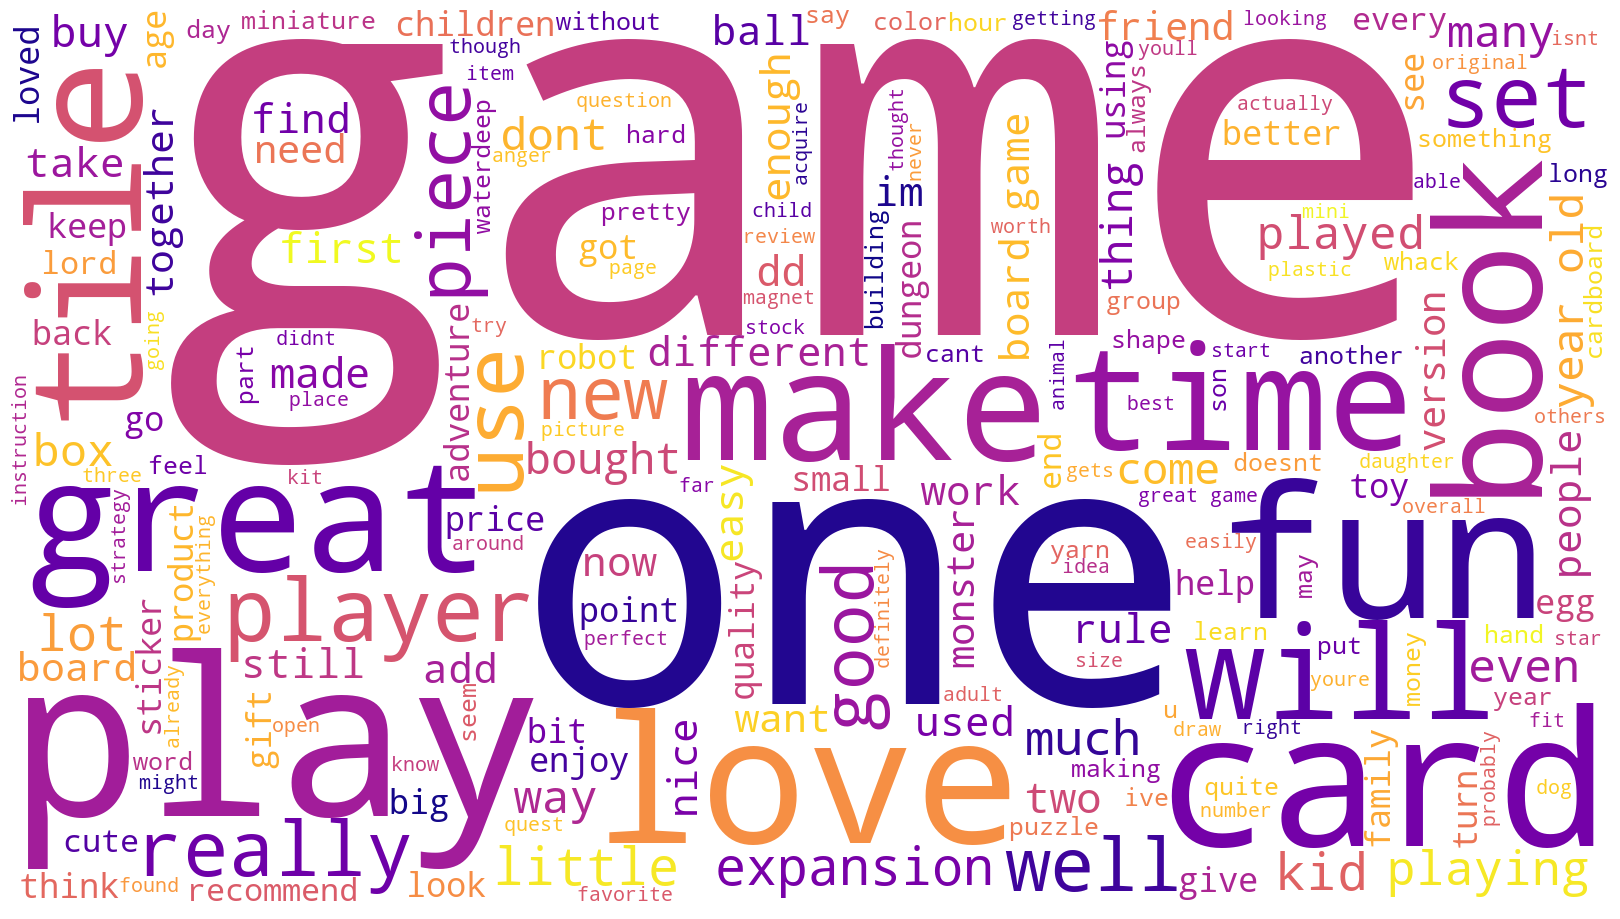

In [438]:
# Create a wordcloud for reviews without stop words.

wordcloud_rev3 = WordCloud(width=1600, height=900,
                           background_color='white',
                           colormap='plasma',
                           min_font_size=10).generate(tokens_rev3_string)

# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud_rev3)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('cloud_rev_ns')
plt.show()

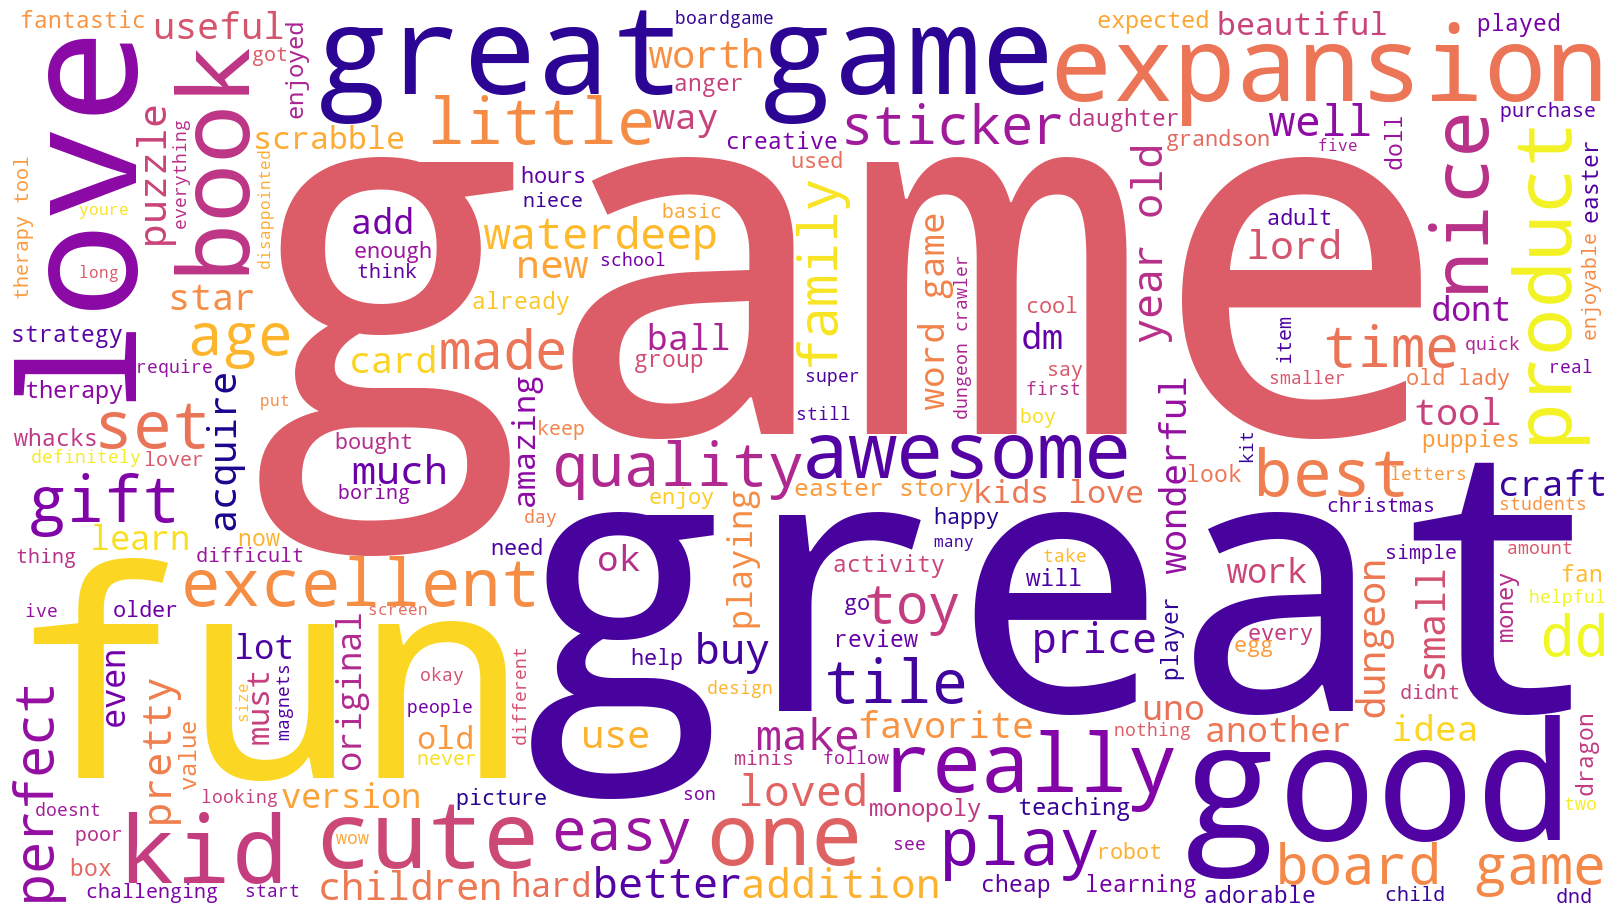

In [437]:
# Create a wordcloud for summary without stop words.

wordcloud_sum3 = WordCloud(width=1600, height=900,
                           background_color='white',
                           colormap='plasma',
                           min_font_size=10).generate(tokens_sum3_string)

# Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud_sum3)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('cloud_sum_ns')
plt.show()

#### Identify 15 most common words and polarity

In [326]:
# Calculate the frequency distribution for reviews without stopwords.
fdist_rev1 = FreqDist(tokens_rev3)

# Preview the data.
fdist_rev1

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 391, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [327]:
# Calculate the frequency distribution for sumary without stopwords.
fdist_sum1 = FreqDist(tokens_sum3)

# Preview the data.
fdist_sum1

FreqDist({'game': 268, 'great': 236, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [440]:
# Generate a DataFrame from Counter for reviews.
counts_rev = pd.DataFrame(Counter(tokens_rev3).most_common(15),
                          columns=['Word', 'Frequency'])

# Preview data.
counts_rev

Word  Frequency
0     game       1359
1      one        475
2     play        442
3      fun        407
4    great        391
5     like        373
6      get        293
7    cards        281
8    tiles        280
9   really        278
10    book        259
11   would        252
12    well        246
13    time        244
14     new        237

In [420]:
turtle_count_rev = df3['review'].str.count('turtle')
total_turtle_count_rev = turtle_count_rev.sum()
print(f'Total number of occurrences of "turtle" in reviews: {total_turtle_count}')

Total number of occurrences of "turtle" in reviews: 1


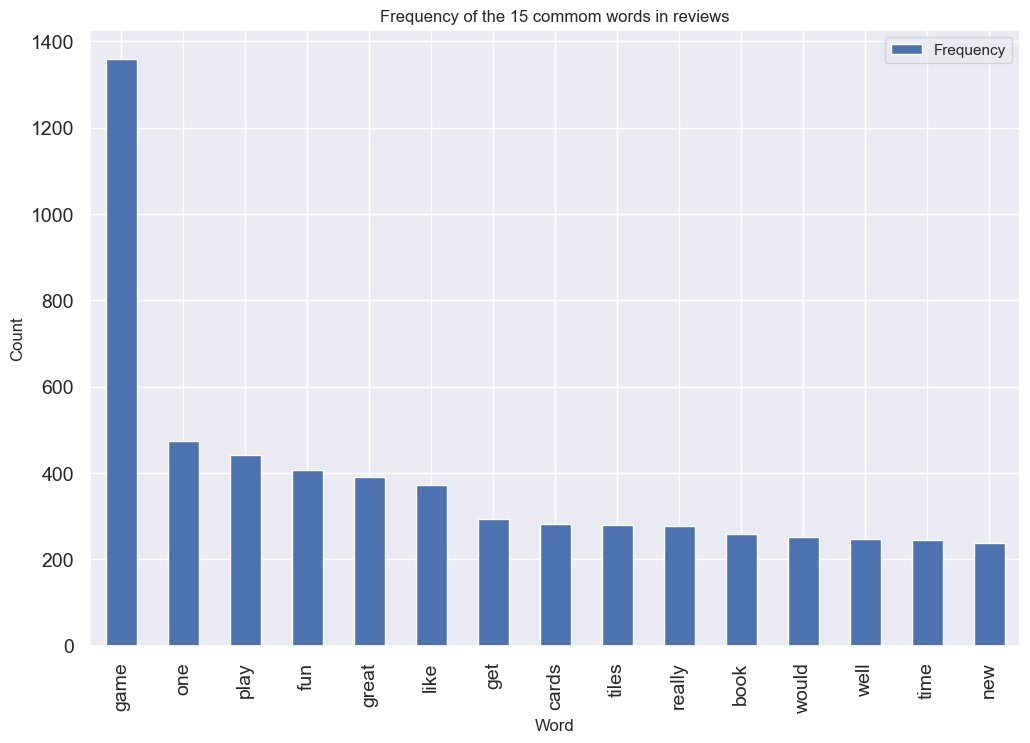

In [483]:
# Create the bar chart
counts_rev.plot(x='Word', y='Frequency', kind='bar')

# Add a title and labels
plt.title('Frequency of the 15 commom words in reviews')
plt.xlabel('Word')
plt.ylabel('Count')
plt.tick_params(axis='both', which='major', labelsize=14, length=8)
plt.savefig('freq_15_rev')
# Show the plot
plt.show()

In [344]:
# Generate a DataFrame from Counter for summary.
counts_sum = pd.DataFrame(Counter(tokens_sum3).most_common(15),
                          columns=['Word', 'Frequency'])

# Preview data.
counts_sum

Word  Frequency
0        game        268
1       great        236
2         fun        175
3        good         84
4        love         70
5        like         54
6        kids         48
7        book         42
8   expansion         42
9        cute         40
10        old         34
11     really         30
12        set         29
13       nice         28
14        one         28

In [423]:
turtle_count_sum = df3['summary'].str.count('turtle')
total_turtle_count_sum = turtle_count_sum.sum()
print(f'Total number of occurrences of "turtle" in reviews: {total_turtle_count}')

Total number of occurrences of "turtle" in reviews: 1


<Figure size 2000x2000 with 0 Axes>

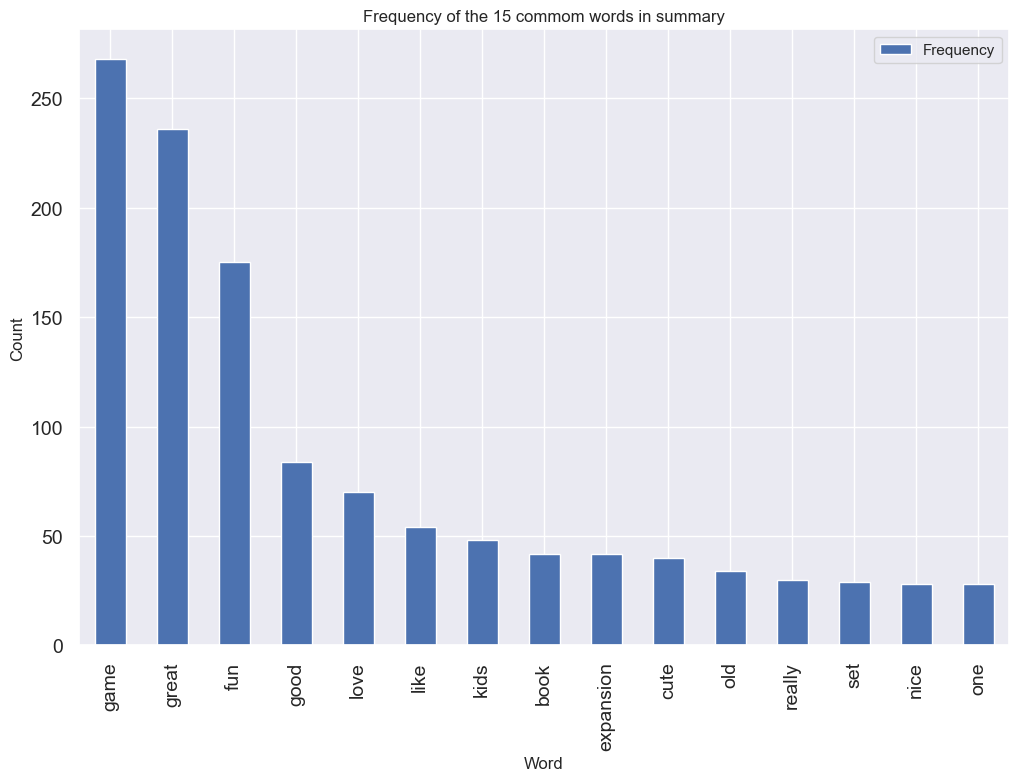

In [488]:
# Create the bar chart
plt.figure(figsize=(20,20))
counts_sum.plot(x='Word', y='Frequency', kind='bar')

# Add a title and labels
plt.title('Frequency of the 15 commom words in summary')
plt.xlabel('Word')
plt.ylabel('Count')
plt.tick_params(axis='both', which='major', labelsize=14, length=8)
plt.savefig('freq_15_sum')
# Show the plot
plt.show()

### Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [330]:
# Define a function to extract a polartiy score.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

#### Calculating the polarity sentiment for the 15 most frequent words used.

In [349]:
# Populate a new column with polarity scores for 15 most frequent words used in review.
counts_rev['polarity_rev_15'] = counts_rev['Word'].apply(generate_polarity)

# Preview the result.
counts_rev

Word  Frequency  polarity_rev_15
0     game       1359        -0.400000
1      one        475         0.000000
2     play        442         0.000000
3      fun        407         0.300000
4    great        391         0.800000
5     like        373         0.000000
6      get        293         0.000000
7    cards        281         0.000000
8    tiles        280         0.000000
9   really        278         0.200000
10    book        259         0.000000
11   would        252         0.000000
12    well        246         0.000000
13    time        244         0.000000
14     new        237         0.136364

In [350]:
# Populate a new column with polarity scores for 15 most frequent words used in summary.
counts_sum['polarity_sum_15'] = counts_sum['Word'].apply(generate_polarity)

# Preview the result.
counts_sum

Word  Frequency  polarity_sum_15
0        game        268             -0.4
1       great        236              0.8
2         fun        175              0.3
3        good         84              0.7
4        love         70              0.5
5        like         54              0.0
6        kids         48              0.0
7        book         42              0.0
8   expansion         42              0.0
9        cute         40              0.5
10        old         34              0.1
11     really         30              0.2
12        set         29              0.0
13       nice         28              0.6
14        one         28              0.0

In [331]:
# Determine polarity of both columns. 

# Populate a new column with polarity scores for review.
df3['polarity_rev'] = df3['review'].apply(generate_polarity)

# Preview the result.
df3['polarity_rev'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_rev, dtype: float64

In [332]:
# Populate a new column with polarity scores for summary.
df3['polarity_sum'] = df3['summary'].apply(generate_polarity)

# Preview the result.
df3['polarity_sum'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_sum, dtype: float64

In [333]:
# Define a function to extract a subjectivity score.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [334]:
# Populate a new column with subjectivity scores for each review.
df3['subjectivity_rev'] = df3['review'].apply(generate_subjectivity)

# Preview the result.
df3['subjectivity_rev'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_rev, dtype: float64

In [335]:
# Populate a new column with subjectivity scores for each summary.
df3['subjectivity_sum'] = df3['summary'].apply(generate_subjectivity)

# Preview the result.
df3['subjectivity_sum'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_sum, dtype: float64

In [336]:
df3.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  polarity_rev  \
0  the fact that 50 of this space is wasted on ar...     -0.036111   
1  another worthless dungeon masters screen from ...      0.035952   
2                     pretty but also pretty useless      0.116640   
3                                         five stars      0.578788   
4                                         money trap     -0.316667   

   polarity_sum  subjectivity_rev  subjectivity_sum  
0          0.15          0.486111          0.500000  
1         -0.80          0.442976          0.900000  
2          0.00          0.430435          0.733333  
3          0.00          0.784848          0.000000  
4          0.00          0.316667          0.000000

#### Create a histogram plot with bins = 15 for review.

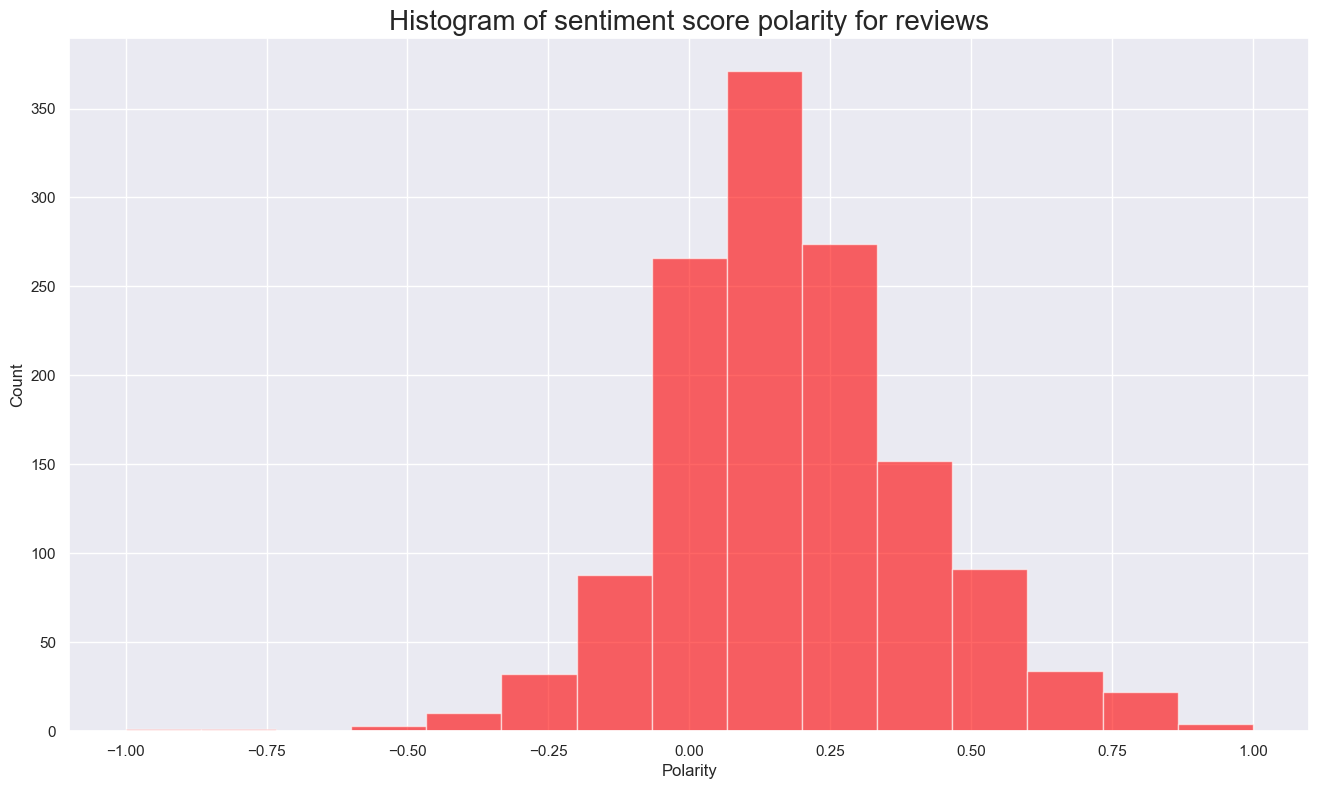

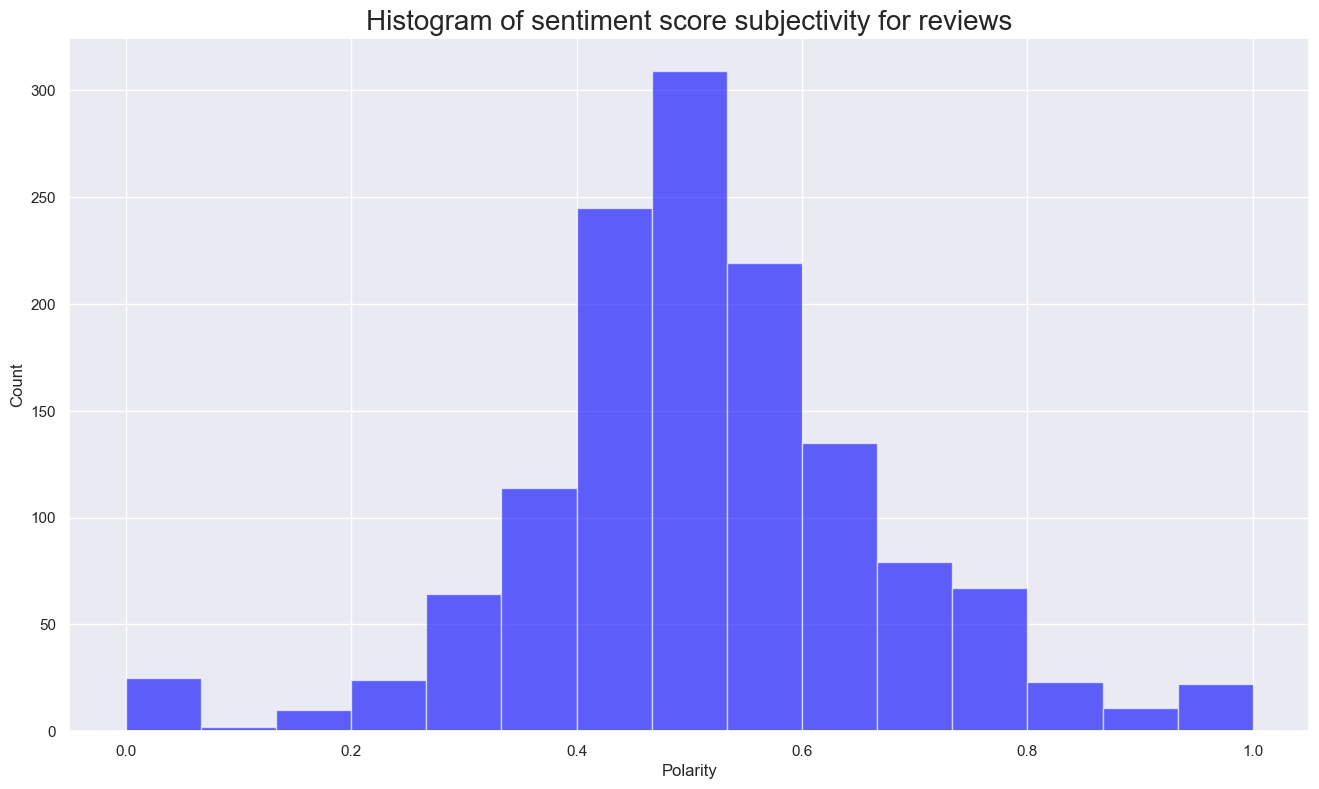

In [489]:
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['polarity_rev'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize=20)
plt.savefig('hist_rev')
# Histogram of subjectivity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['subjectivity_rev'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for reviews', fontsize=20)
plt.savefig('hist_rev_sub')
plt.show()


#### Create a histogram plot with bins = 15 for summary.

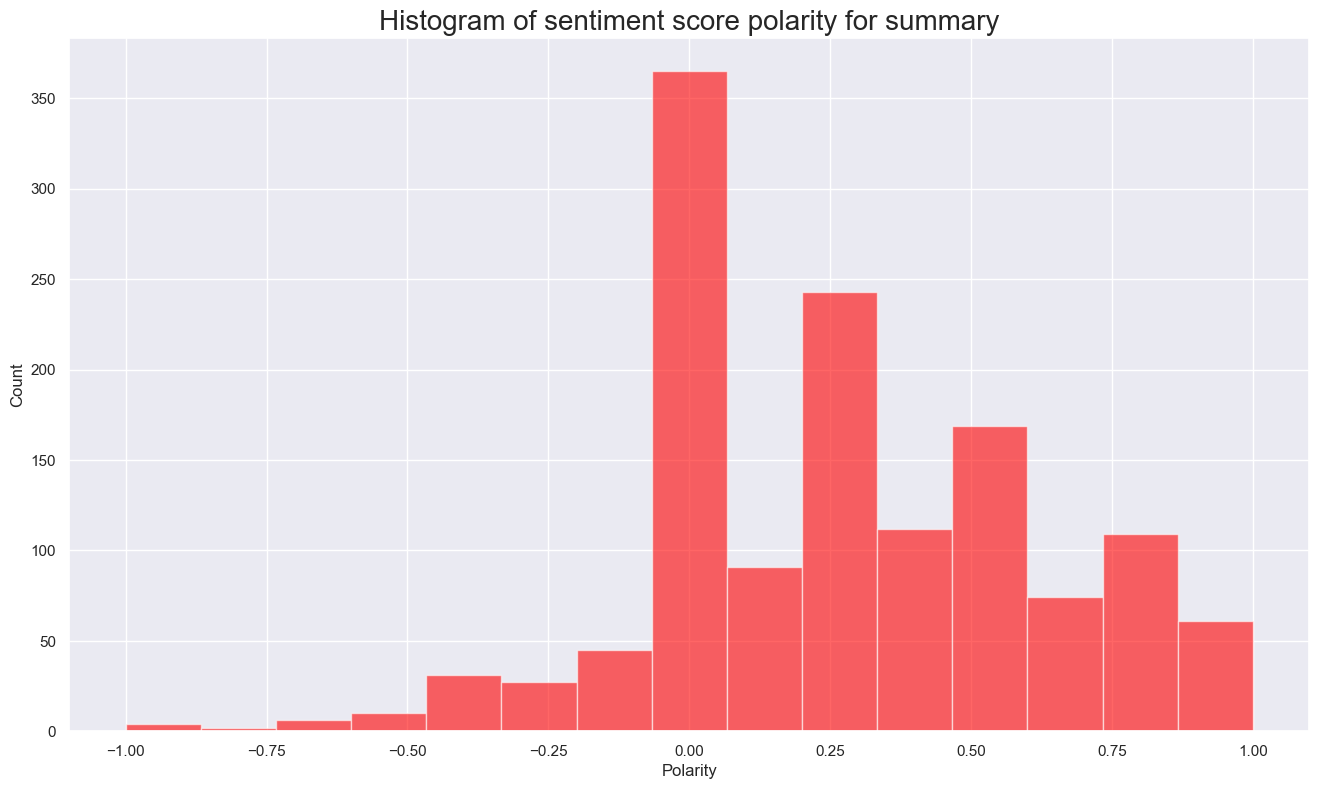

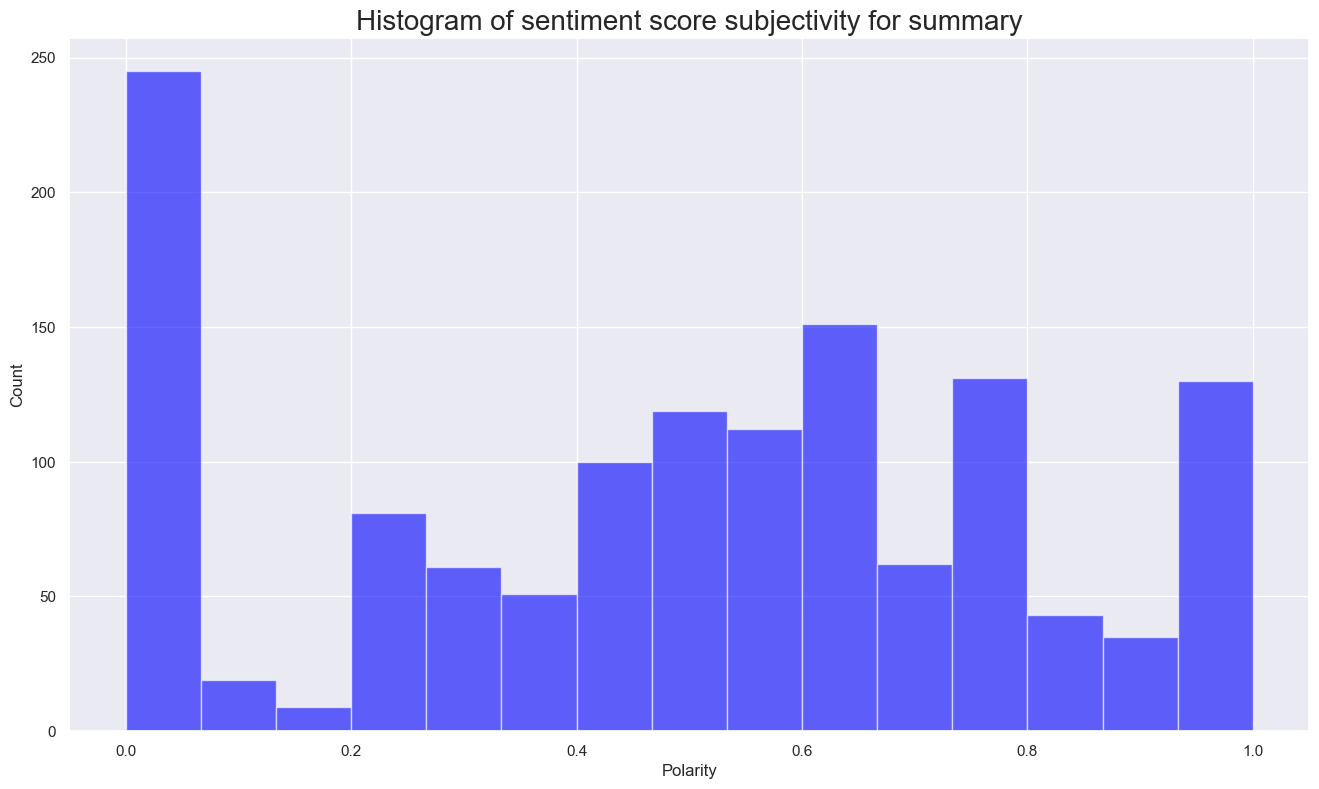

In [490]:
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['polarity_sum'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summary', fontsize=20)
plt.savefig('hist_sum')
plt.show()

# Histogram of subjectivity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3['subjectivity_sum'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for summary', fontsize=20)
plt.savefig('hist_sum_sub')
plt.show()

#### Identify and print the top 20 Positive and negative polarity for reviews and summary.

In [384]:
# To view the entire reivew and summary column.
pd.set_option('display.max_colwidth', None)

In [354]:
# Sort the DataFrame by the 'polarity_rev' column in descending order
df4 = df3.sort_values(by='polarity_rev', ascending=False)

In [385]:
# Select the top 20 positive reviews
top_pos_reviews = df4.head(20)

#View the top 20 +ve reviews.
top_pos_reviews[['review', 'polarity_rev']]

review  \
564                                                                                                                                                               perfect   
1080                                                                                                             my daughter loves her stickers awesome seller thank you    
1334                                                                                                                         perfect for tutoring my grandson in spelling   
890   the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy   
498                                                                                                                    great quality very cute and perfect for my toddler   
1333                                                                                                           this is a great tool to have at hand when playing quiddler   
336                                                                                                                         great seller happy with my purchase 5 starrrr   
1287                                                                                                                                   prompt service and a great product   
1187                                                                                                                        a great creation tool it helps me concentrate   
824                                                                                                                                           husband seems happy with it   
828                                                                                  great price arrived on time with no damage will be a great addition to my collection   
31                                                                                 the pictures are great  ive done one and gave it to a friend of mine who likes dragons   
692                                                                                                          bought this because i wanted it all these dd games are great   
439                                                                                                                                            great easter gift for kids   
1075                                                                                                my granddaughter loves these so happy to find peppa pig items for her   
1113                                                                        great doll to go with the book  animals cant wait to read book with the doll to the grandkids   
826                                                                                                                           great accessory to use with the playing mat   
893                                                                this is a great accessory to the starter set i would recommend this to anyone who owns the starter set   
491                                                                                                                                                       these are great   
325                                                                                this is a great product i use it as a therapeutic tool and it has been very effective    

      polarity_rev  
564       1.000000  
1080      1.000000  
1334      1.000000  
890       0.880000  
498       0.816667  
1333      0.800000  
336       0.800000  
1287      0.800000  
1187      0.800000  
824       0.800000  
828       0.800000  
31        0.800000  
692       0.800000  
439       0.800000  
1075      0.800000  
1113      0.800000  
826       0.800000  
893       0.800000  
491       0.800000  
325       0.790000

In [362]:
# Sort the DataFrame by the 'polarity_rev' column in ascending order
df5 = df3.sort_values(by='polarity_rev', ascending=True)

In [386]:
# Select the top 20 negative reviews
top_neg_reviews = df5.head(20)

#View the top 20 -ve reviews.
top_neg_reviews[['review', 'polarity_rev']]

review  \
165                                                                                                                                                                booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not   
147                                                                                                                                                                                                                                                                                   incomplete kit very disappointing   
267                                                                                     one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it   
90                                                                                                                                                                                                            i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift   
141   i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed   
251                                                                                                      my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed   
382                                                                                                                                                             i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through   
713                                                                                                                                if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon   
1011                                                                                                                                                                                you can play the expansions one at a time or add then both in for a longer game if your into lords of waterdeep this is a must have   
355                                                                                                                                                                                                                      my son loves playing this game it was recommended by a counselor at school that works with him   
312                                                                                                                                                    this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities   
723                                                                                                                                                                                                 if you play dungeons and dragons then you will find this board game to be dumb and boring stick with the real thing   
600                                                                                                                                                  i was a bit disappointed in the quality of the cardboard piec

In [381]:
# Sort the DataFrame by the 'polarity_sum' column in descending order
df6 = df3.sort_values(by='polarity_sum', ascending=False)

In [387]:
# Select the top 20 positive summary
top_pos_summary = df6.head(20)

#View the top 20 +ve summary.
top_pos_summary[['summary', 'polarity_sum']]

summary  \
150                                                                 awesome   
541   perfect tool for learning how to tell time one on one with your child   
337                                                               excellent   
581                                              one of the best games ever   
1080                                               awesome seller thank you   
776                                                    best dungeon crawler   
1078                 loves stickers and she loves peppa so this was perfect   
982                                                       awesome expansion   
720                                                  best one in the series   
737                          excellent introduction to dungeons and dragons   
1062                                                         wonderful gift   
389                                                  excellent therapy tool   
544                                         excellent onthego teaching tool   
996                                                           wonderful and   
407                  the pigeon is the perfect addition to a school library   
786                      excellent product and everything i wanted it to be   
1042                       the perfect gift for preschool construction fans   
1003                                                    excellent expansion   
521                                            the best feedback i can have   
514                                                        excellent puzzle   

      polarity_sum  
150            1.0  
541            1.0  
337            1.0  
581            1.0  
1080           1.0  
776            1.0  
1078           1.0  
982            1.0  
720            1.0  
737            1.0  
1062           1.0  
389            1.0  
544            1.0  
996            1.0  
407            1.0  
786            1.0  
1042           1.0  
1003           1.0  
521            1.0  
514            1.0

In [380]:
# Sort the DataFrame by the 'polarity_sum' column in ascending order
df7 = df3.sort_values(by='polarity_sum', ascending=True)

In [388]:
# Select the top 20 -ve summary
top_neg_summary = df7.head(20)

#View the top 20 -ve summary.
top_neg_summary[['summary', 'polarity_sum']]

summary  \
165                              boring unless you are a craft person which i am    
587                                                                        boring   
17                                                  the worst value ive ever seen   
837   before this i hated running any rpg campaign dealing with towns because it    
1                        another worthless dungeon masters screen from galeforce9   
116                                                                  disappointed   
266                            promotes anger instead of teaching calming methods   
637                                                  bad qualityall made of paper   
634                                      too bad this is not what i was expecting   
144                               at age 31 i found these very difficult to make    
75                                                               small and boring   
368                                                                    mad dragon   
575                                                                 disappointing   
723                      then you will find this board game to be dumb and boring   
267                                                            anger control game   
1249                                                                ball of weird   
646                                     50th anniversary is a sad day for acquire   
1137                                                                cant go wrong   
59                                                      really small disappointed   
1116           its also really lame that the doll didnt come with the things she    

      polarity_sum  
165      -1.000000  
587      -1.000000  
17       -1.000000  
837      -0.900000  
1        -0.800000  
116      -0.750000  
266      -0.700000  
637      -0.700000  
634      -0.700000  
144      -0.650000  
75       -0.625000  
368      -0.625000  
575      -0.600000  
723      -0.591667  
267      -0.550000  
1249     -0.500000  
646      -0.500000  
1137     -0.500000  
59       -0.500000  
1116     -0.500000

### Observations & Conclusions.
- The polarity score and subjectivity of both review and summary are positive.
- The top 20 positive reviews and summary are strongly positive as values are 1 or closer to 1.
- The top 20 negative reviews and summary are more closer to -0.5.
- Both of which shows that people have a stronger positive sentiments towards the products.
- The brand name turtle do appear to be not at all popular as in the whole data frame there is only one each occurance of turtle appearing in review and sumary.
